# Air Quality Index(AQI) in India
### Jan 2015 -  Jul 2020
***

In this notebook, basic exploratory data analysis is performed and the effect of lockdown on India's Air Quality is visualised. 

### Contents:


<span style='color:Indigo'>
    
1. What is AQI?<br>

2. Handling and manipulating data<br>
   2.1 Importing Libraries<br>
   2.2 Basic Exploration of Data<br>
   
3. Visualising Data<br>
   3.1 AQI Stations in India<br>
   3.2 Yearwise AQI trends in India<br>
   3.3 Effect of Lockdown on AQI<br>
   3.4 Considering the effect of lockdown on Delhi<br>
</span>

## <span style='color:Green'>1. What is AQI?  </span>

An **air quality index (AQI)** is used by government agencies to communicate to the public how polluted the air currently is or how polluted it is forecast to become.Public health risks increase as the AQI rises. The indices of AQI vary from location to location.

In **India**, The **National Air Quality Index (AQI)** was launched in **New Delhi** on September 17, 2014, under the Swachh Bharat Abhiyan.The AQI is mainly divided into **six** categories. These are **Good, Satisfactory, Moderately polluted, Poor, Very Poor,** and **Severe**. The proposed AQI will consider **eight pollutants** (PM10, PM2.5, NO2, SO2, CO, O3, NH3, and Pb) for which short-term (up to 24-hourly averaging period) National Ambient Air Quality Standards are prescribed. 

The standards for AQI are described as follows.
![](aqi.png)

The higher the AQI value, the greater the level of air pollution and the greater the health concern.

**On 24 March 2020**, the Government of India under **Prime Minister Narendra Modi** ordered a nationwide **lockdown**, limiting movement of the entire 1.3 billion population of India as a preventive measure against the COVID-19 pandemic in India. The AQI trends before and after the lockdown are contrasted.

## <span style='color:Green'>2. Handling and Manipulating Data </span>

### 2.1  Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.2 Basic exploration of data
Checking what the data comprises of and gaining information about following: 

1. head of the dataset
2. the shape of the dataset
3. info of the dataset
4. summary of the dataset

#### 1. City dataframe

In [2]:
city = pd.read_csv("city_day.csv")
city.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
#Number of rows and columns in the dataframe
city.shape

(29531, 16)

In [4]:
#Checking information about the data and its respective attributes
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.3+ MB


In [5]:
city.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


#### 2. Stations Dataframe

In [6]:
#Checking head of the dataframe
stations = pd.read_csv("stations.csv")
stations.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [7]:
# Number of rows and columns in the dataframe
stations.shape

(230, 5)

In [8]:
# Checking information about the data and its respective attributes
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       133 non-null    object
dtypes: object(5)
memory usage: 4.6+ KB


In [9]:
stations.describe()

,StationId,StationName,City,State,Status
count,230,230,230,230,133
unique,230,230,127,21,2
top,HR026,"DRM Office Danapur, Patna - BSPCB",Delhi,Delhi,Active
freq,1,1,38,38,131


### Handling missing values

Now check for the missing values in the dataframe. These missing values can be treated in different ways.
1. Drop the missing value
2. Impute with mean or median value (preferred in case of outliers): for numerical columns
3. Impute with mode value: for categorical columns

#### 1. City dataframe

In [10]:
# Finding missing values in the dataframe
missing_values = pd.isnull(city).mean()
missing_values.sort_values(ascending =False)

Xylene        0.613220
PM10          0.377231
NH3           0.349734
Toluene       0.272290
Benzene       0.190410
AQI_Bucket    0.158511
AQI           0.158511
PM2.5         0.155701
NOx           0.141715
O3            0.136196
SO2           0.130507
NO2           0.121398
NO            0.121296
CO            0.069723
Date          0.000000
City          0.000000
dtype: float64

We do not drop the values as it may delete required data. Hence, the columns having missing values are replaced by median in case of numerical columns and by mode in case of categorical columns.

In [11]:
city.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [12]:
col_list = [ 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in col_list:
    city[col] = city[col].replace(np.nan,city[col].median())
city.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,NaN
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,NaN
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,NaN
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,NaN
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,NaN


In [13]:
#Replacing categorical column i.e. AQI_Bucket by mode
mode = city["AQI_Bucket"].mode().values[0]
city["AQI_Bucket"] = city["AQI_Bucket"].replace(np.nan,mode)
city.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


In [14]:
#Checking dataframe for any missing values left
pd.isnull(city).sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

#### 2. Stations dataframe

In [15]:
# Finding missing values in the dataframe
missing_values = pd.isnull(stations).mean()
missing_values.sort_values(ascending =False)

Status         0.421739
State          0.000000
City           0.000000
StationName    0.000000
StationId      0.000000
dtype: float64

Since there is only one column, "Status" having null values and being a categorical column we will remove the missing values.

In [16]:
#Removing missing values
pd.isnull(stations["Status"]).sum()
stations.dropna(axis = 0, subset = ["Status"],inplace = True)

In [17]:
# Rechecking the dataframe for any missing values
pd.isnull(stations).sum()

StationId      0
StationName    0
City           0
State          0
Status         0
dtype: int64

### Handling duplicate data

#### 1. City Dataframe

In [18]:
#Checking if there is any duplicate data
duplicates = city.duplicated()
print(duplicates.sum())

0


Since there is no duplicate data, so there is no need of handling it.

#### 2. Stations Dataframe

In [19]:
dup = stations.duplicated()
print(dup.sum())

0


Since there is no duplicate data, so there is no need of handling it.

### Handling outliers for AQI in City dataframe
Outliers are the extreme data points that deviate from patterns in the rest of the data. Generally, outliers are identified with the help of boxplots.
The outliers can be treated as:
1. Drop the outlier value
2. Replace the outlier value using the IQR

Text(0, 0.5, 'Cities')

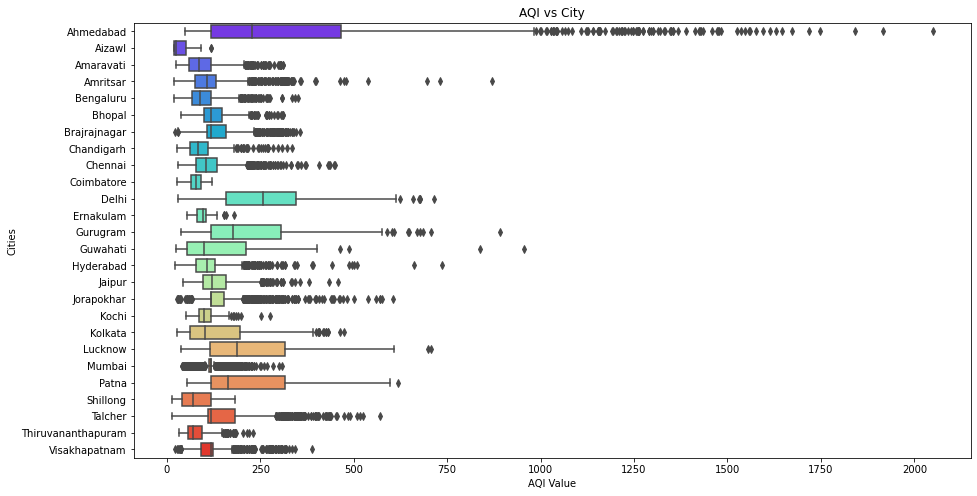

In [21]:
plt.figure(figsize =(15,8))
aqi_city = sns.boxplot(y = "City", x ="AQI",data= city,palette = "rainbow")
plt.title("AQI vs City")
aqi_city.set_xlabel("AQI Value")
aqi_city.set_ylabel("Cities")

In [22]:
# Identifying outliers with IQR (Inter Quantile Range)
Q1 = city.quantile(0.25)
Q3 = city.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PM2.5      40.300
PM10       32.565
NO         11.360
NO2        21.685
NOx        21.345
NH3         9.715
CO          0.840
SO2         7.720
O3         21.990
Benzene     2.180
Toluene     4.740
Xylene      0.000
AQI        91.000
dtype: float64


In [23]:
# Checking outliers based on the IQR calculated above.
city_out = city[~((city < (Q1 - 1.5 * IQR)) |(city > (Q3 + 1.5 * IQR))).any(axis=1)]
print(city_out.shape)

(9427, 16)


Thumbrule: values not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are considered as outliers and can be removed.
But above range gives almost 9000 values which may delete most of the meaningful data. Hence we cannot remove outliers from this data.

##  <span style='color:Green'>3. Visualizing Data  </span>

### 3.1 AQI Stations in India

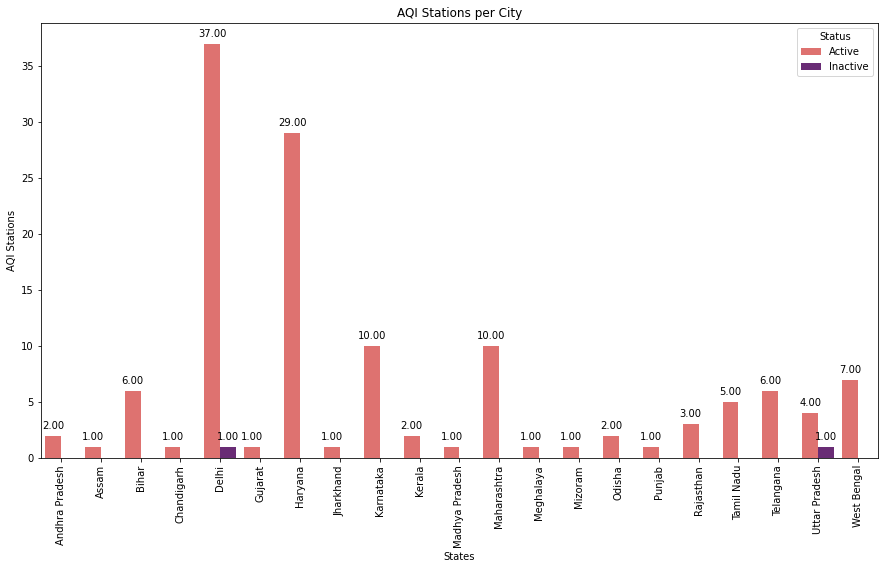

In [24]:
# Plotting AQI stations in india per state
plt.figure(figsize = (15,8))
plot1 = sns.countplot(x = "State",data = stations,hue = "Status",palette = "magma_r")
plot1.set_xticklabels(labels = plot1.get_xticklabels(),rotation=90)
plot1.set_xlabel("States")
plot1.set_ylabel("AQI Stations")
plot1.set_title("AQI Stations per City")

for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

It can be seen from above counplot(formed by using the data we manipulated) that Delhi has maximum active AQI Stations i.e 37 ,followed by Haryana (29) and there are in all 2 inactive stations 1 in Delhi and 1 in Uttar Pradesh. 

**Note**: Some of the stations whose status is unknown are not shown in the plot.

### 3.2 Yearwise AQI trends in India

Here, variation in AQI for various cities is visualised for the years 2015 to 2020. Heatmaps are used to showcase the trends of AQI.

In [25]:
#Dataframe for year 2015
year1 = city[(city["Date"] >= "2015-01-01") & (city["Date"] <= "2015-12-31")]
#Dataframe for year 2016
year2 = city[(city["Date"] >= "2016-01-01") & (city["Date"] <= "2016-12-31")]
#Dataframe for year 2017
year3 = city[(city["Date"] >= "2017-01-01") & (city["Date"] <= "2017-12-31")]
#Dataframe for year 2018
year4 = city[(city["Date"] >= "2018-01-01") & (city["Date"] <= "2018-12-31")]
#Dataframe for year 2019
year5 = city[(city["Date"] >= "2019-01-01") & (city["Date"] <= "2019-12-31")]
#Dataframe for year 2020
year6 = city[(city["Date"] >= "2020-01-01") & (city["Date"] <= city["Date"].max())]

In [26]:
# Making pivot tables to plot heatmaps
y1 = year1.pivot_table(index = "City",columns = "AQI_Bucket",values = "AQI")
y2 = year2.pivot_table(index = "City",columns = "AQI_Bucket",values = "AQI")
y3 = year3.pivot_table(index = "City",columns = "AQI_Bucket",values = "AQI")
y4 = year4.pivot_table(index = "City",columns = "AQI_Bucket",values = "AQI")
y5 = year5.pivot_table(index = "City",columns = "AQI_Bucket",values = "AQI")
y6 = year6.pivot_table(index = "City",columns = "AQI_Bucket",values = "AQI")

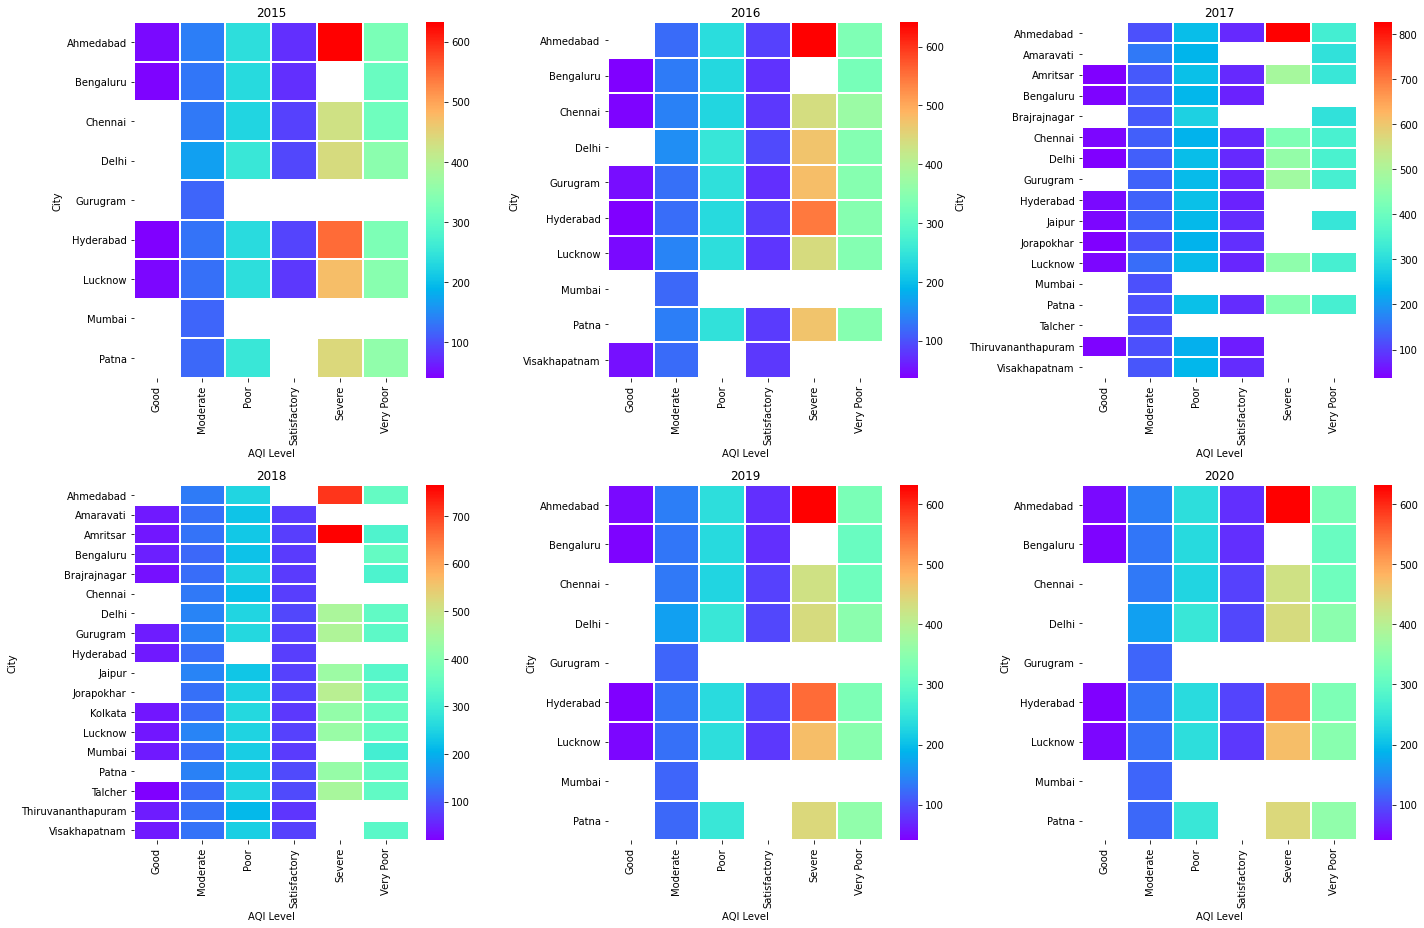

In [27]:
fig = plt.figure(figsize = (20,13))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

#Plotting heatmaps
##Year 1
y1_plot = sns.heatmap(y1,cmap = "rainbow",ax = ax1,linewidth =1)
y1_plot.set_title("2015")
y1_plot.set_xlabel("AQI Level")

##Year 2
y2_plot = sns.heatmap(y2,cmap = "rainbow",ax = ax2,linewidth =1)
y2_plot.set_title("2016")
y2_plot.set_xlabel("AQI Level")

##Year 3
y3_plot = sns.heatmap(y3,cmap = "rainbow",ax = ax3,linewidth =1)
y3_plot.set_title("2017")
y3_plot.set_xlabel("AQI Level")

##Year 4
y4_plot = sns.heatmap(y4,cmap = "rainbow",ax = ax4,linewidth =1)
y4_plot.set_title("2018")
y4_plot.set_xlabel("AQI Level")

##Year 5
y5_plot = sns.heatmap(y1,cmap = "rainbow",ax = ax5,linewidth =1)
y5_plot.set_title("2019")
y5_plot.set_xlabel("AQI Level")

##Year 6
y6_plot = sns.heatmap(y1,cmap = "rainbow",ax = ax6,linewidth =1)
y6_plot.set_title("2020")
y6_plot.set_xlabel("AQI Level")


plt.tight_layout()

The above heatmaps give an idea about the average AQI trends for a particular year for various cities. 

It can be inferred from the plots that metropolitan cities like Delhi,Bangalore,Hyderabad,Chennai and Lucknow had a moderate to severe AQI.

### 3.4 Effect of Lockdown on AQI

In [28]:
#Dataframe of AQI values before lockdown in India (before 25th March'2020)
pre_ld = city[city["Date"]<"2020-03-25"]
pre_ld.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


In [29]:
#Dataframe of AQI values after lockdown in India i.e. after 25th March'2020 till July 01,2020
post_ld = city[city["Date"] >= "2020-03-25"]
post_ld.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1910,Ahmedabad,2020-03-25,33.25,91.38,4.28,33.45,19.44,15.85,4.28,61.40,38.86,4.90,18.98,2.85,195.0,Moderate
1911,Ahmedabad,2020-03-26,43.67,91.12,7.11,26.61,17.61,15.85,7.11,34.72,39.74,4.71,19.16,2.80,216.0,Poor
1912,Ahmedabad,2020-03-27,22.93,37.12,5.23,18.52,12.87,15.85,5.23,16.19,34.41,1.58,7.50,1.08,193.0,Moderate
1913,Ahmedabad,2020-03-28,37.73,72.43,4.67,35.52,20.77,15.85,4.67,16.06,34.72,6.37,26.05,3.56,160.0,Moderate
1914,Ahmedabad,2020-03-29,20.67,75.48,3.08,26.98,15.46,15.85,3.08,22.76,40.17,4.79,15.29,1.95,125.0,Moderate


Text(0, 0.5, 'Cities')

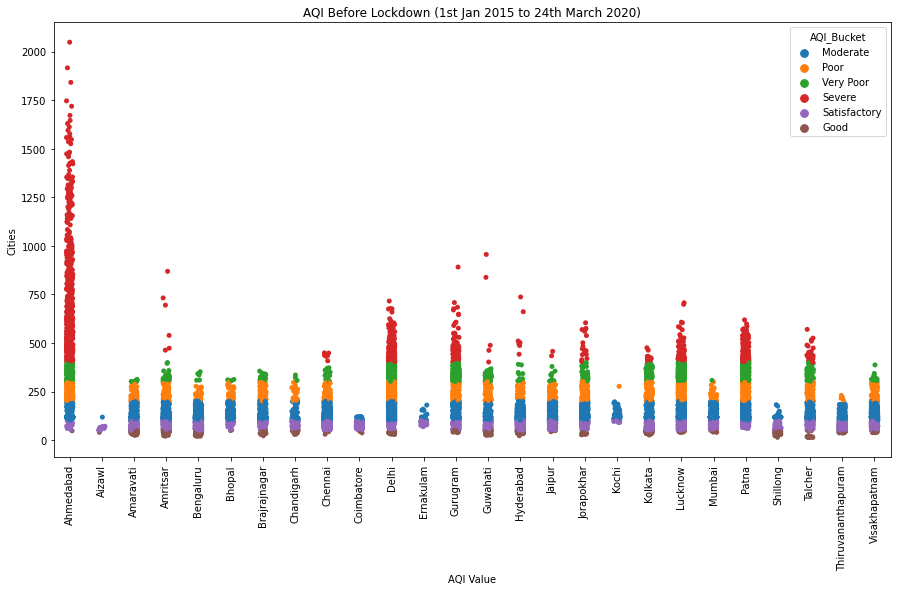

In [30]:
# Plotting AQI for different cities before lockdown period
plt.figure(figsize = (15,8))
plot2 = sns.stripplot(x = "City" ,y = "AQI" ,data = pre_ld,hue = "AQI_Bucket")
plot2.set_xticklabels(labels = plot2.get_xticklabels(),rotation = 90 )
plot2.set_title("AQI Before Lockdown (1st Jan 2015 to 24th March 2020)")
plot2.set_xlabel("AQI Value")
plot2.set_ylabel("Cities")

It can be seen from above plot that the AQI values for most of the cities like Ahmedabad, Chennai, Delhi, Jaipur,Lucknow etc. is severe. However most of the cities are in the category of very poor AQI.

Text(0, 0.5, 'AQI Values')

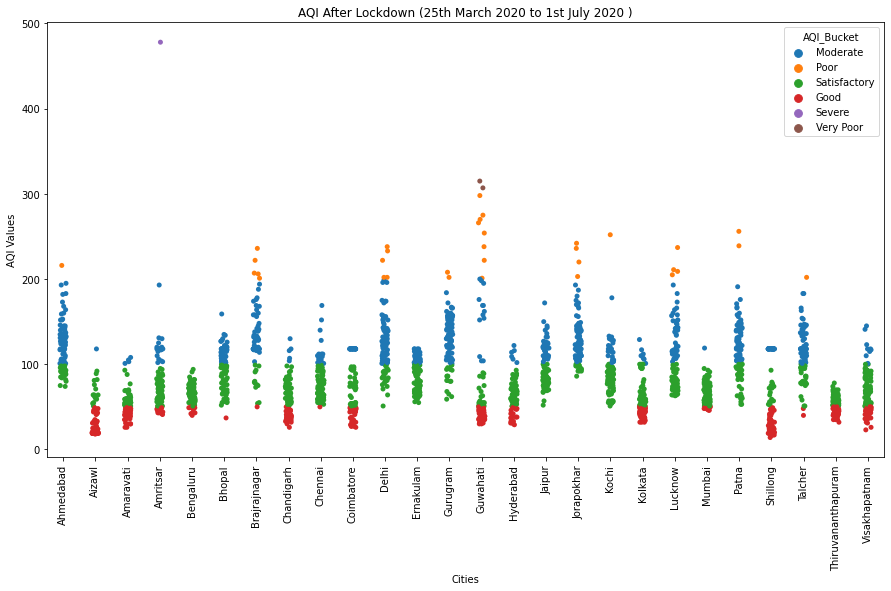

In [31]:
#Plotting AQI for the same cities referred above post lockdown
plt.figure(figsize = (15,8))
plot3 = sns.stripplot(x = "City" ,y = "AQI" ,data = post_ld,hue = "AQI_Bucket")
plot3.set_xticklabels(labels = plot3.get_xticklabels(),rotation=90)
plot3.set_title("AQI After Lockdown (25th March 2020 to 1st July 2020 )")
plot3.set_xlabel("Cities")
plot3.set_ylabel("AQI Values")

From above plot it can be seen that AQI values for the cities was Good and Satisfactory for a long time , hence, it improved a lot amidst lockdown but as the unlock started, it tend to become poor.

### Considering the effect of lockdown on Delhi

This section will show yearly analysis of Delhi.Heatmaps are plotted to consider the variations and using these we can get to know what was the average AQI for a particular year. 

But first the data is manipulated for visualizations.

In [33]:
# Data of Delhi prior to Covid 19 lockdown
pre_del = city[(city["City"] =="Delhi") & ((city["Date"] <= "2020-03-24") & (city["Date"] >= "2015-01-01"))]
# Data of Delhi post Covid 19 lockdown
post_del = city[(city["City"] =="Delhi") & (city["Date"] > "2020-03-24")]

In [34]:
pre_del1 = pre_del.copy()
pre_del1.set_index(pre_del1["Date"])
pre_del1.index = pd.to_datetime(pre_del1["Date"])

In [35]:
pre_del_group = pre_del1.groupby(pd.Grouper(freq = "Y"))
new_data1 = pre_del_group.mean() # Data after lockdown in Delhi, grouped by years
new_data1.shape

(6, 13)

In [36]:
post_del1 = post_del.copy()
post_del1.set_index(post_del1["Date"])
post_del1.index = pd.to_datetime(post_del1["Date"])

In [37]:
post_del_group = post_del1.groupby(pd.Grouper(freq = "M"))
new_data2 = post_del_group.mean() # Data after lockdown in Delhi, grouped by years
new_data2.shape

(5, 13)

The major pollutants of air are carbon monoxide, lead, nitrogen oxides, ground-level ozone, particle pollution (often referred to as particulate matter), and sulfur oxides.

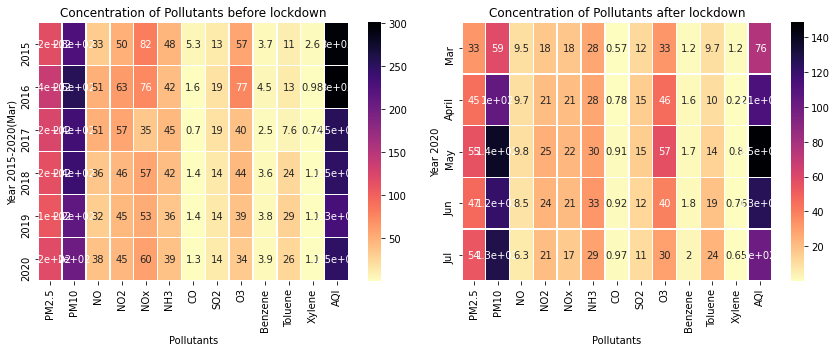

In [38]:
fig = plt.figure(figsize = (12,5))
axes1 = fig.add_subplot(121)
axes2 = fig.add_subplot(122)

# Plotting concentration of pollutants before lockdown
y_labels1 = [2015,2016,2017,2018,2019,2020]
p4 = sns.heatmap(data = new_data1,cmap="magma_r",ax = axes1,yticklabels = y_labels1,linewidth=0.5,annot =True)
p4.set_title("Concentration of Pollutants before lockdown")
p4.set_xlabel("Pollutants")
p4.set_ylabel("Year 2015-2020(Mar)")

# Plotting concentration of pollutants after lockdown
y_labels2 = ["Mar","April","May","Jun","Jul"]
p5 = sns.heatmap(data = new_data2,cmap="magma_r",ax = axes2,yticklabels = y_labels2,linewidth=0.5,annot =True)
p5.set_title("Concentration of Pollutants after lockdown")
p5.set_xlabel("Pollutants")
p5.set_ylabel("Year 2020")

plt.tight_layout()

Delhi is in a spot of bother. The air quality is poor or very poor with patches of severe air quality throughout the year. Most of the air quality is poor which implies that it can harm the health of indiviuals in a bad way.
It can be shown from the Heatmaps that concentration of pollutants decreased a lot in 2020 post lockdown. Hence lockdown had a positive impact on environment and AQI improved. 

***
### Conclusion:

Basic data exploration is done. Considering the AQI stations in India and AQI values from year 2015-2020, the effect of lockdown imposed by Government of India, in order to prevent the spread of Covid-19, has been studied using data manipulation and visualisation techniques. 